In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/final.csv")

# 1. Exploratory Analysis and Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73838 entries, 0 to 73837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   شهر                 73838 non-null  object 
 1   رتبه کشوری          73838 non-null  int64  
 2   رتبه در منطقه       73838 non-null  float64
 3   منطقه               73838 non-null  object 
 4   سابقه کانونی        73838 non-null  int64  
 5   میانگین تراز کانون  73838 non-null  int64  
 6   تعداد آزمون         73838 non-null  float64
 7   رشته قبولی          73838 non-null  object 
 8   دانشگاه قبولی       73838 non-null  object 
 9   رشته مدرسه          73838 non-null  object 
 10  سال                 73838 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 6.2+ MB


In [4]:
df.describe()

,رتبه کشوری,رتبه در منطقه,سابقه کانونی,میانگین تراز کانون,تعداد آزمون,سال
count,73838.000000,73838.000000,73838.000000,73838.000000,73838.000000,73838.000000
mean,2672.840746,698.594938,2.291584,6514.482800,37.974783,1395.343685
std,2528.303374,767.619912,1.500203,692.877897,25.778463,2.623654
min,1.000000,1.000000,1.000000,0.000000,0.000000,1390.000000
25%,768.000000,209.000000,1.000000,6058.000000,19.000000,1393.000000
50%,1786.500000,493.000000,2.000000,6572.000000,32.000000,1395.000000
75%,3836.750000,849.000000,3.000000,6987.000000,50.000000,1397.000000
max,18255.000000,5426.000000,13.000000,8693.000000,239.000000,1400.000000


In [5]:
df.isnull().sum()

شهر                   0
رتبه کشوری            0
رتبه در منطقه         0
منطقه                 0
سابقه کانونی          0
میانگین تراز کانون    0
تعداد آزمون           0
رشته قبولی            0
دانشگاه قبولی         0
رشته مدرسه            0
سال                   0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# Convert float values to integer.
df['رتبه در منطقه'] = df['رتبه در منطقه'].astype(int)
df['تعداد آزمون'] = df['تعداد آزمون'].astype(int)

# Filter out invalid rows. 
df = df[df['میانگین تراز کانون'] > 0]

In [8]:
df.head()

,شهر,رتبه کشوری,رتبه در منطقه,منطقه,سابقه کانونی,میانگین تراز کانون,تعداد آزمون,رشته قبولی,دانشگاه قبولی,رشته مدرسه,سال
0,تهران,1,1,منطقه 1,3,7738,72,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400
1,رفسنجان,2,1,منطقه 2,6,7857,120,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400
2,اراك,3,2,منطقه 2,7,7589,142,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400
3,اراك,5,4,منطقه 2,3,7529,79,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400
4,مشهد,6,2,منطقه 1,1,7645,23,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400


In [9]:
df['منطقه'].unique()

array(['منطقه 1', 'منطقه 2', 'منطقه 3', 'ايثارگر-5%', 'ايثارگر-25%',
       'ايثارگران', 'خانواده شهدا', 'منطقه يک', 'منطقه دو', 'منطقه سه',
       'منطقه یک'], dtype=object)

In [10]:
# Fix different typo of region
df['منطقه'] = df['منطقه'].str.replace('منطقه يک', 'منطقه 1')
df['منطقه'] = df['منطقه'].str.replace('منطقه یک', 'منطقه 1')
df['منطقه'] = df['منطقه'].str.replace('منطقه دو', 'منطقه 2')
df['منطقه'] = df['منطقه'].str.replace('منطقه سه', 'منطقه 3')
df['منطقه'] = df['منطقه'].str.replace('ايثارگر-5%' ,'ايثارگر 5درصد')
df['منطقه'] = df['منطقه'].str.replace('ايثارگر-25%' ,'ايثارگر 25درصد')

# Merge related ones
df['منطقه'] = df['منطقه'].str.replace('ايثارگران' ,'ايثارگر 5درصد')
df['منطقه'] = df['منطقه'].str.replace('خانواده شهدا' ,'ايثارگر 5درصد')

In [11]:
df['سال'].unique()

array([1400, 1399, 1398, 1397, 1396, 1395, 1394, 1393, 1392, 1391, 1390])

In [12]:
df['رشته مدرسه'].unique()

array(['ریاضی', 'انسانی', 'زبان', 'هنر', 'تجربی'], dtype=object)

In [13]:
from provinces_and_cities import Iran

# Load province–city structure
raw = Iran.all
lookup = pd.DataFrame(raw)
                     
# lookup:
#   name (province)
#   cities (list of city names)

# Explode city list → one row per city
lookup = lookup.explode('cities')

# Rename lookup cols to match our dataset
lookup = lookup.rename(columns={
    'cities': 'شهر',
    'name': 'استان'
})

# Normalize Persian/Arabic characters
def normalize(s):
    return (
        s.str.strip()
         .str.replace("ي", "ی")
         .str.replace("ك", "ک")
         .str.replace("ۀ", "ه")
         .str.replace("‌", "")
    )
df['شهر'] = normalize(df['شهر'])
lookup['شهر'] = normalize(lookup['شهر'])

# Join with lookup and add province to our dataset
df = df.merge(lookup[['شهر', 'استان']], on='شهر', how='left')

# Mark unmatched cities as unknown
df['استان'] = df['استان'].fillna('نامعلوم')

df.head()

,شهر,رتبه کشوری,رتبه در منطقه,منطقه,سابقه کانونی,میانگین تراز کانون,تعداد آزمون,رشته قبولی,دانشگاه قبولی,رشته مدرسه,سال,استان
0,تهران,1,1,منطقه 1,3,7738,72,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400,تهران
1,رفسنجان,2,1,منطقه 2,6,7857,120,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400,کرمان
2,اراک,3,2,منطقه 2,7,7589,142,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400,مرکزی
3,اراک,5,4,منطقه 2,3,7529,79,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400,مرکزی
4,مشهد,6,2,منطقه 1,1,7645,23,مهندسي کامپيوتر,دانشگاه صنعتي شريف - تهران,ریاضی,1400,خراسان رضوی


# 2. Data Visualization

## When is feature engineering a nice-to-have option, and when is it a must-have?

explain

In [14]:
from arabic_reshaper import reshape
from bidi.algorithm import get_display

# Format persian text to be printed well in charts
def fa(text):
    return get_display(reshape(text))

In [15]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20, Viridis256

output_notebook()

# Count acceptances per province
province_counts = df.groupby("استان").size().reset_index(name="count")
province_counts = province_counts.sort_values("count", ascending=False)

source = ColumnDataSource(province_counts)
provinces = province_counts["استان"].tolist()

# Generate a palette with enough colors
if len(provinces) <= 20:
    palette = Category20[len(provinces)]
else:
    import numpy as np
    palette = [Viridis256[int(i)] for i in np.linspace(0, 255, len(provinces))]

# Create figure
p = figure(
    x_range=provinces,
    height=500,
    width=900,
    title="تعداد قبولی‌ها به تفکیک استان",
    toolbar_location="right",
    tooltips=[("استان", "@استان"), ("تعداد", "@count")]
)

# The bar chart
p.vbar(
    x="استان",
    top="count",
    width=0.8,
    source=source,
    fill_color=factor_cmap("استان", palette=palette, factors=provinces)
)

# Format plot and add labels
p.xaxis.major_label_orientation = 1.2
p.xaxis.axis_label = "استان"
p.yaxis.axis_label = "تعداد قبولی‌ها"

show(p)

Loading BokehJS ...

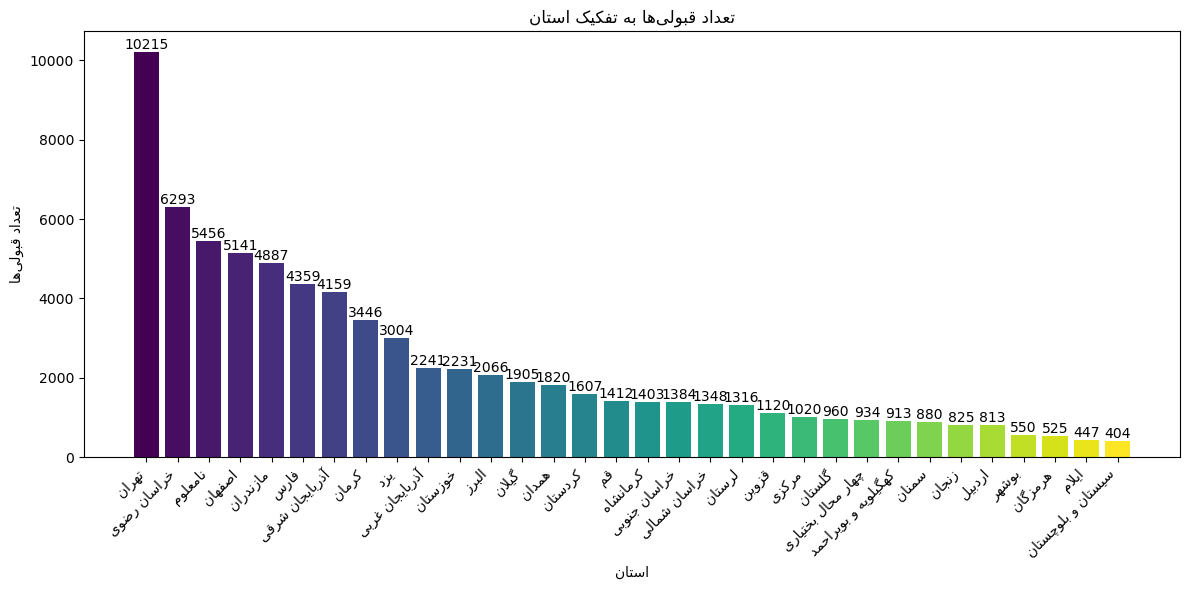

In [16]:
# Format province names for correct display
provinces = [fa(name) for name in province_counts["استان"]]
counts = province_counts["count"].tolist()

# Generate colors
num_provinces = len(provinces)
if num_provinces <= 20:
    cmap = plt.get_cmap('tab20')
    colors = [cmap(i) for i in range(num_provinces)]
else:
    cmap = plt.get_cmap('viridis')
    colors = [cmap(i / (num_provinces - 1)) for i in range(num_provinces)]

# The bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(provinces, counts, color=colors)

# Set labels and title with Persian text
ax.set_xlabel(fa("استان"))
ax.set_ylabel(fa("تعداد قبولی‌ها"))
ax.set_title(fa("تعداد قبولی‌ها به تفکیک استان"))

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Add count labels on top of bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(count),
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

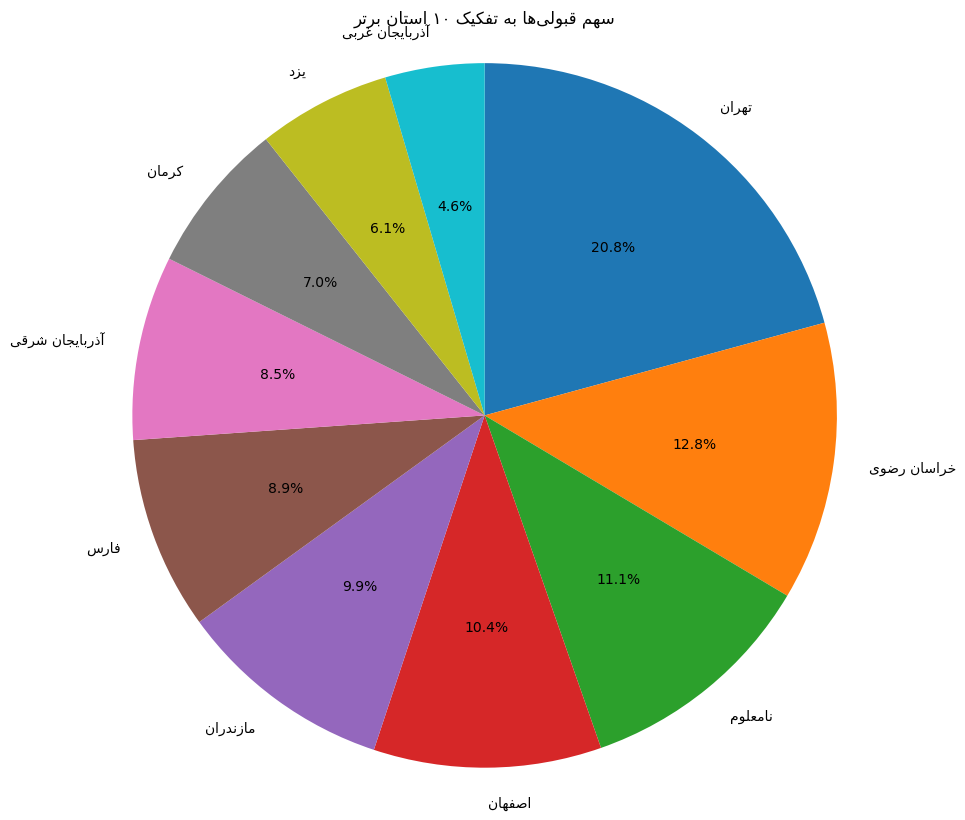

In [17]:
# Format labels
labels = [fa(name) for name in province_counts['استان'].head(10)]

# Show with pie chart
plt.figure(figsize=(10,10))
plt.pie(
    province_counts['count'].head(10),
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False
)
plt.title(fa("سهم قبولی‌ها به تفکیک ۱۰ استان برتر"))
plt.axis("equal")
plt.show()

In [18]:
output_notebook()

# Count per province + school major
grouped = df.groupby(['استان', 'رشته مدرسه']).size().reset_index(name='count')

# Compute percentage per province
total_per_province = grouped.groupby('استان')['count'].transform('sum')
grouped['percent'] = grouped['count'] / total_per_province * 100

# Pivot table: rows=province, columns=school major, values=percent
pivot = grouped.pivot(index='استان', columns='رشته مدرسه', values='percent').fillna(0)

provinces = pivot.index.tolist()
school_majors = pivot.columns.tolist()

data = {'استان': provinces}
for major in school_majors:
    data[major] = pivot[major].tolist()

source = ColumnDataSource(data)

# Provide colors
palette = Category20[len(school_majors)] if len(school_majors) <= 20 else [Category20[20][i % 20] for i in range(len(school_majors))]

# Create figure
p = figure(
    x_range=provinces,
    height=500,
    width=900,
    title="درصد رشته‌های مدرسه به تفکیک استان",
    toolbar_location="right",
    tooltips="$name: @$name%"
)

# The stack bar
p.vbar_stack(
    school_majors,
    x='استان',
    width=0.8,
    color=palette,
    source=source,
    legend_label=school_majors
)

# Format plot
p.xaxis.major_label_orientation = 1.2
p.xaxis.axis_label = "استان"
p.yaxis.axis_label = "درصد (%)"
p.y_range.start = 0
p.y_range.end = 100
p.legend.title = "رشته مدرسه"
p.legend.location = "top_right"
p.legend.label_text_font_size = "8pt"

show(p)

Loading BokehJS ...

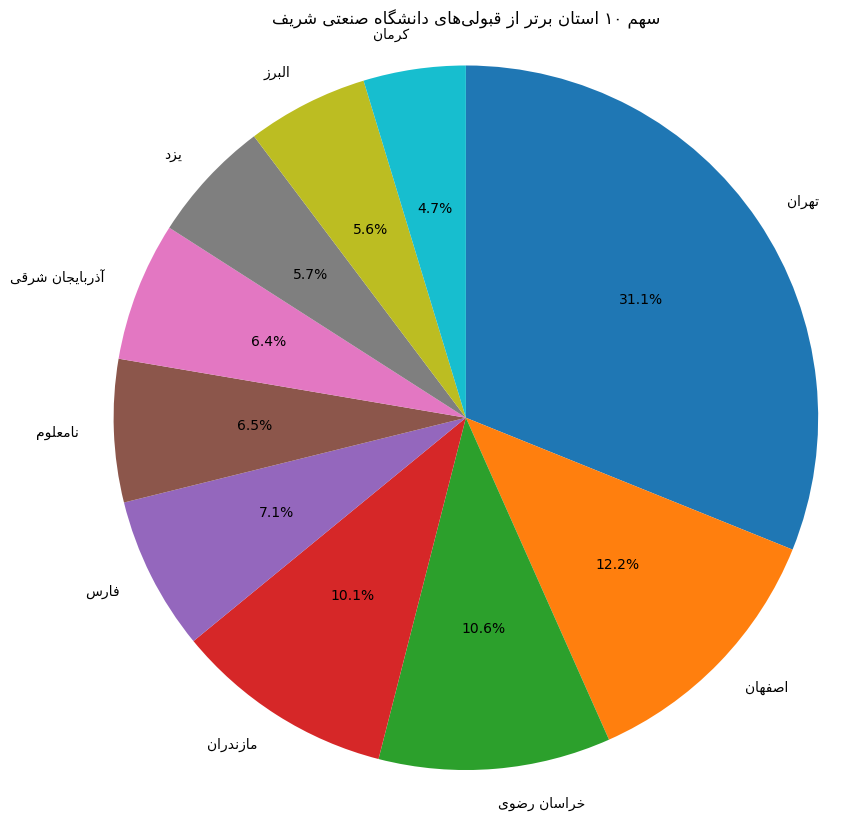

In [19]:
# Filter for SUT
sharif_df = df[df['دانشگاه قبولی'] == "دانشگاه صنعتي شريف - تهران"]

# Count number of acceptances per city
city_counts = sharif_df['استان'].value_counts().head(10)

labels = [fa(city) for city in city_counts.index]

# Plot pie chart
plt.figure(figsize=(10,10))
plt.pie(
    city_counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False
)
plt.title(fa("سهم ۱۰ استان برتر از قبولی‌های دانشگاه صنعتی شریف"))
plt.axis("equal")
plt.show()

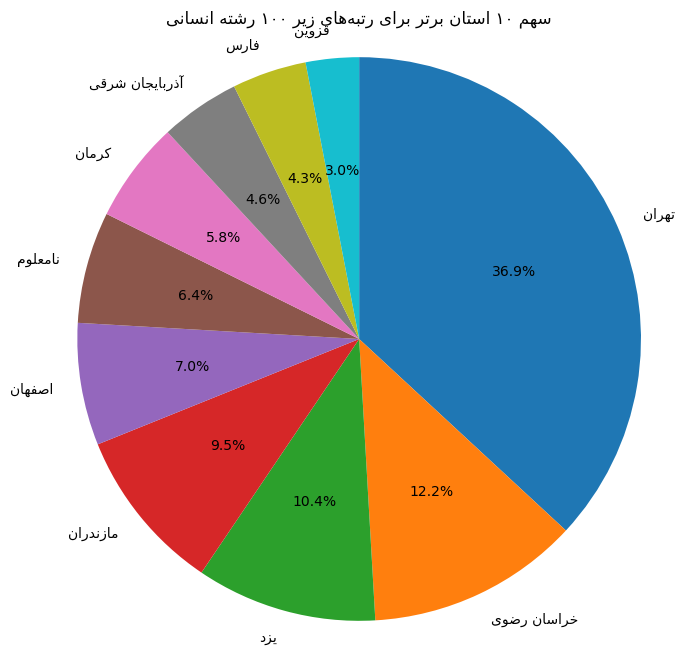

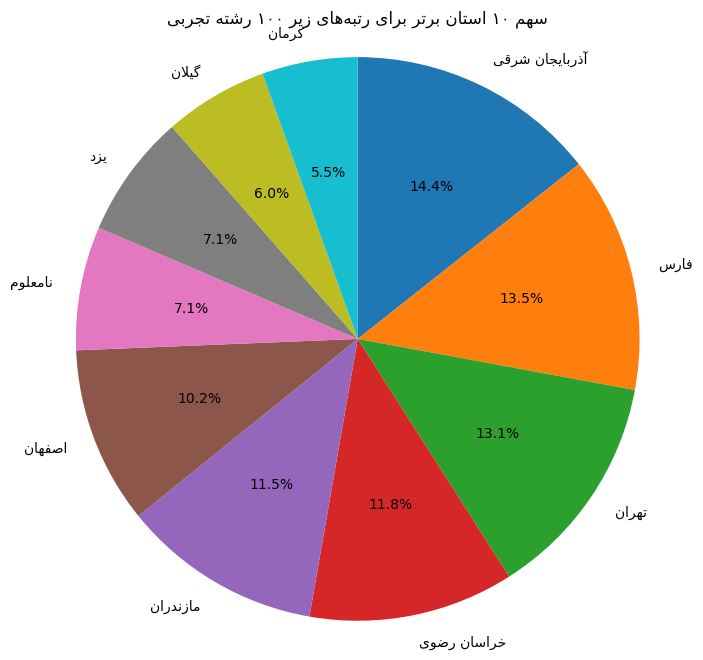

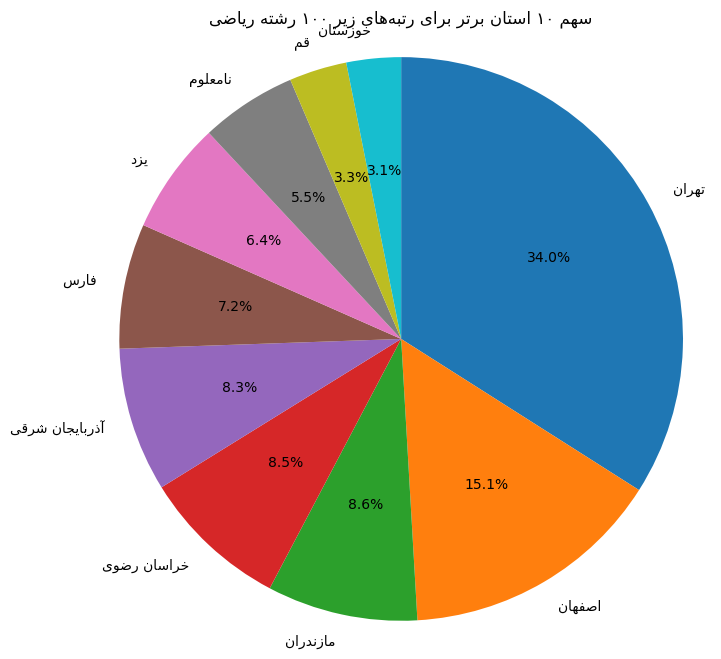

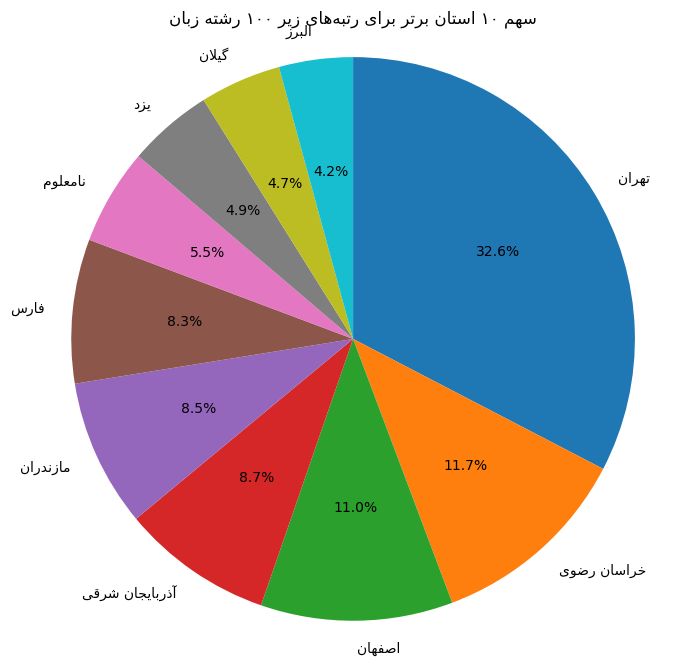

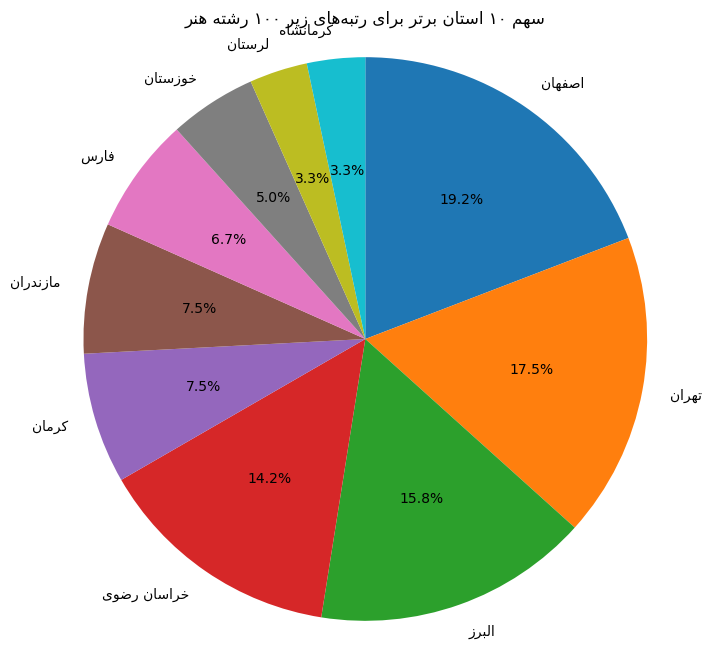

In [20]:
# Filter top 100 accptance
top100_df = df[df['رتبه کشوری'] <= 100]

# Group by province + major
grouped = top100_df.groupby(['رشته مدرسه', 'استان']).size().reset_index(name='count')

# List of major
majors = grouped['رشته مدرسه'].unique()

# Loop over each major
for major in majors:
    major_df = grouped[grouped['رشته مدرسه'] == major].copy()
    
    # Sort by count descending and take top 10 provinces
    major_df = major_df.sort_values(by='count', ascending=False).head(10)
    
    counts = major_df['count']
    provinces = major_df['استان']
    
    # Format lebels
    labels = [fa(p) for p in provinces]
    title = fa(f"سهم ۱۰ استان برتر برای رتبه‌های زیر ۱۰۰ رشته {major}")
    
    # Plot pie chart
    plt.figure(figsize=(8,8))
    wedges, texts, autotexts = plt.pie(
        counts,
        labels=labels,
        autopct="%1.1f%%",
        startangle=90,
        counterclock=False
    )    
    plt.title(title, fontsize=12)
    plt.axis('equal')
    plt.show()

We see that the metropolis have the most acceptance rate of top students.

Correlation of each feature with National Rank:


میانگین تراز کانون   -0.635570
تعداد آزمون          -0.052916
سابقه کانونی         -0.039185
رتبه کشوری            1.000000
Name: رتبه کشوری, dtype: float64

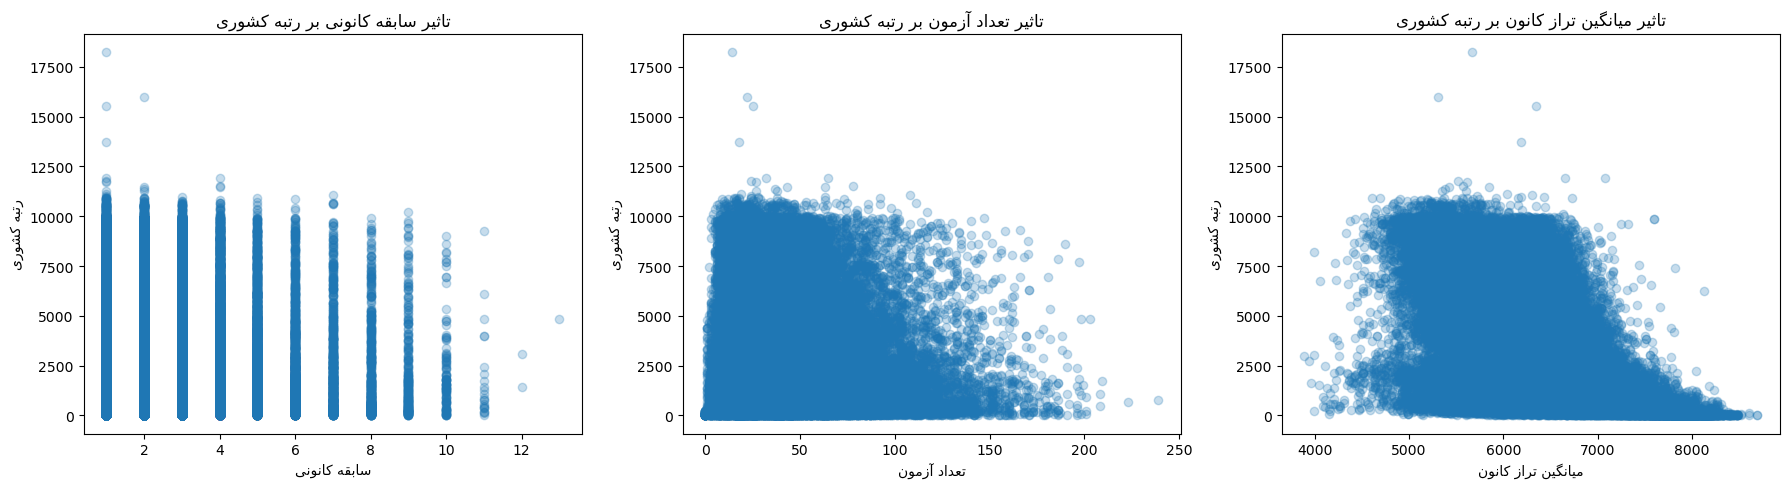

In [21]:
# Select relevant columns
cols = ["سابقه کانونی", "تعداد آزمون", "میانگین تراز کانون", "رتبه کشوری"]
data = df[cols]

# Compute correlation with national rank
correlations = data.corr()["رتبه کشوری"].sort_values()
print("Correlation of each feature with National Rank:")
display(correlations)

# Plot scatter charts for each feature
plt.figure(figsize=(18, 5))

features = ["سابقه کانونی", "تعداد آزمون", "میانگین تراز کانون"]
for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    plt.scatter(df[col], df["رتبه کشوری"], alpha=0.25)
    plt.title(fa(f"تاثیر {col} بر رتبه کشوری"))
    plt.xlabel(fa(col))
    plt.ylabel(fa("رتبه کشوری"))

plt.tight_layout()
plt.show()

We see that the میانگین تراز کانون has the most effect on رتبه کشوری in the dataset features.

In [22]:
province_name_map = {
    'آذربایجان شرقی': 'East Azarbaijan',
    'آذربایجان غربی': 'West Azarbaijan',
    'اردبیل': 'Ardebil',
    'اصفهان': 'Esfahan',
    'البرز': 'Alborz',
    'بوشهر': 'Bushehr',
    'تهران': 'Tehran',
    'چهار محال بختیاری': 'Chahar Mahall and Bakhtiari',
    'خراسان جنوبی': 'South Khorasan',
    'خراسان رضوی': 'Razavi Khorasan',
    'خراسان شمالی': 'North Khorasan',
    'خوزستان': 'Khuzestan',
    'زنجان': 'Zanjan',
    'سمنان': 'Semnan',
    'سیستان و بلوچستان': 'Sistan and Baluchestan',
    'فارس': 'Fars',
    'قزوین': 'Qazvin',
    'قم': 'Qom',
    'کردستان': 'Kordestan',
    'کرمان': 'Kerman',
    'کرمانشاه': 'Kermanshah',
    'کهگیلویه و بویراحمد': 'Kohgiluyeh and Buyer Ahmad',
    'گلستان': 'Golestan',
    'گیلان': 'Gilan',
    'لرستان': 'Lorestan',
    'مازندران': 'Mazandaran',
    'مرکزی': 'Markazi',
    'هرمزگان': 'Hormozgan',
    'همدان': 'Hamadan',
    'یزد': 'Yazd',
    'ایلام': 'Ilam',
    'نامعلوم': None
}

reversed_dict = {v: k for k, v in province_name_map.items()}

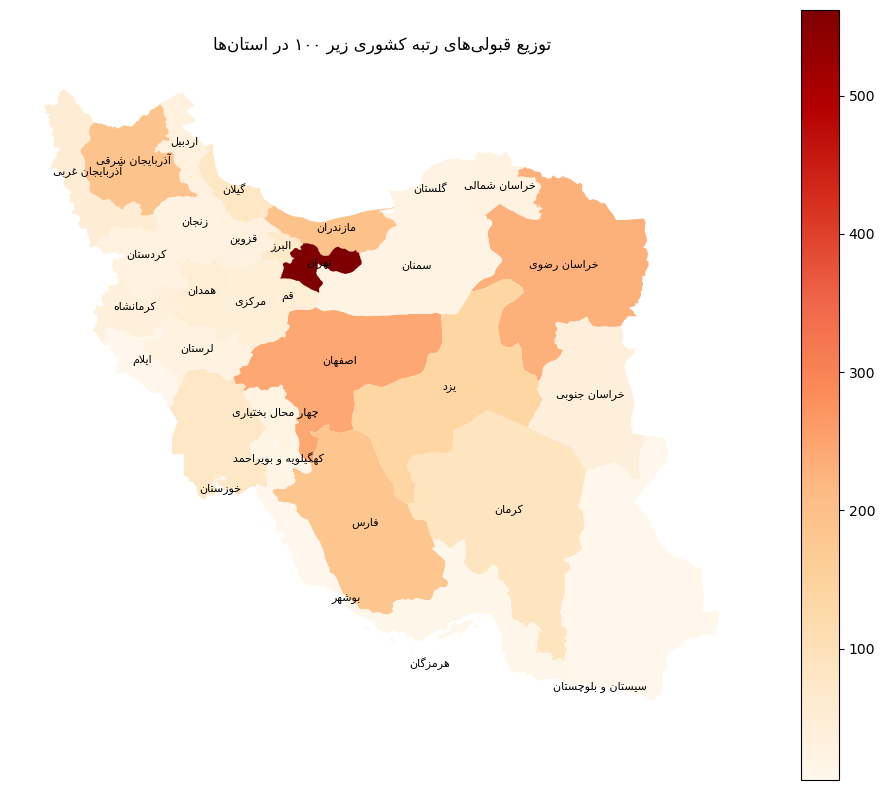

In [23]:
import geopandas as gpd

# Load Iran map
iran_map = gpd.read_file("data/gadm41_IRN_1.shp")

# Group by province
top_100_by_province = top100_df.groupby('استان').size().reset_index(name='تعداد قبولی')

# Add english province name to join the map dateset
top_100_by_province['استان_انگلیسی'] = top_100_by_province['استان'].map(province_name_map)

# Join with map dataset
merged = iran_map.merge(top_100_by_province, left_on='NAME_1', right_on='استان_انگلیسی', how='left')

# Show plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='تعداد قبولی', ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"})

# Add province name to the plot
for idx, row in merged.iterrows():
    if row['geometry'].geom_type == 'Polygon':
        centroid = row['geometry'].centroid
        ax.text(centroid.x, centroid.y, fa(reversed_dict[row['NAME_1']]), fontsize=8, ha='center', color='black')
    elif row['geometry'].geom_type == 'MultiPolygon':
        centroid = row['geometry'].geoms[0].centroid
        ax.text(centroid.x, centroid.y, fa(reversed_dict[row['NAME_1']]), fontsize=8, ha='center', color='black')

ax.set_title(fa("توزیع قبولی‌های رتبه کشوری زیر ۱۰۰ در استان‌ها"))
ax.axis('off')
plt.show()

# 3. Feature Engineering

In [30]:
copy_df = df.copy()

# Ratio Features
copy_df["ratio_rank_country_avg"] = copy_df["رتبه کشوری"] / copy_df["میانگین تراز کانون"]
copy_df["exam_per_experience"] = copy_df["تعداد آزمون"] / (copy_df["سابقه کانونی"])

# Mathematical Transforms
copy_df["log_rank_country"] = np.log1p(copy_df["رتبه کشوری"])
copy_df["log_rank_region"] = np.log1p(copy_df["رتبه در منطقه"])
copy_df["log_exam_count"] = np.log1p(copy_df["تعداد آزمون"])
copy_df["rank_sqrt"] = np.sqrt(copy_df["رتبه کشوری"])
copy_df["score_squared"] = copy_df["میانگین تراز کانون"] ** 2
copy_df["rank_score_interaction"] = copy_df["رتبه کشوری"] * copy_df["میانگین تراز کانون"]
copy_df["experience_exam_interaction"] = copy_df["سابقه کانونی"] * copy_df["تعداد آزمون"]

# Categorical Stats
copy_df["school_major_mean_rank"] = copy_df.groupby("رشته مدرسه")["رتبه کشوری"].transform("mean")
copy_df["state_unique_majors"] = copy_df.groupby("استان")["رشته قبولی"].transform("nunique")

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression

df_mi = copy_df.copy()

# Encode categorical columns
categorical_cols = df_mi.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df_mi[col] = le.fit_transform(df_mi[col])

# Define target & features
target = "رتبه کشوری"
X = df_mi.drop(columns=[target])
y = df_mi[target]

# Compute Mutual Information
mi_scores = mutual_info_regression(X, y, random_state=42)

mi_df = pd.DataFrame({
    "feature": X.columns,
    "MI_score": mi_scores
}).sort_values(by="MI_score", ascending=False)

display(mi_df)

,feature,MI_score
16,rank_sqrt,8.628163
13,log_rank_country,8.566984
11,ratio_rank_country_avg,2.877808
18,rank_score_interaction,2.750060
1,رتبه در منطقه,1.970146
14,log_rank_region,1.864815
17,score_squared,0.414726
4,میانگین تراز کانون,0.414139
7,دانشگاه قبولی,0.328654
9,سال,0.256360


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Encode categorical columns
df_pca = df.copy()
for col in categorical_cols:
    df_pca[col] = le.fit_transform(df_pca[col])

# Standardize numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Apply PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Create PCA dataframe
pca_df = pd.DataFrame(X_pca, columns=[f"PCA_{i+1}" for i in range(X_pca.shape[1])])
pca_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,2.915854,0.151783,-0.246153,-1.611738,0.937384
1,3.860623,3.195151,-0.173001,-0.229459,0.741014
2,4.241513,3.753259,-0.750732,-1.330063,-0.162948
3,2.694890,0.839543,-0.107881,-0.718779,0.359150
4,1.772941,-1.377444,0.431981,-0.345861,2.202711


In [34]:
# Explained variance
explained = pca.explained_variance_ratio_

cum_var = np.cumsum(explained)
n_components_95 = np.argmax(cum_var >= 0.95) + 1
print("Number of components for 95% variance:", n_components_95)

Number of components for 95% variance: 1


### When is feature engineering a nice-to-have, and when is it a must-have?

Feature engineering is helpful but optional when the dataset is already rich and clean and the model can learn patterns on its own, for example deep learning models that automatically capture interactions. It becomes essential when the data is small, noisy, or lacks clear signals, when simpler models cannot detect relationships without manual feature creation, or when domain knowledge must be added to make patterns understandable and usable for the model.

# 4. Web Scraping

In [24]:
import requests

def fetch_page(page):
    url = f"https://bama.ir/cad/api/search?yearFrom=1386-2007&vehicle=samand&pageIndex={page}"
    response = requests.get(url)
    response.raise_for_status()
    data = response.json()
    return data['data']['ads']

all_ads = []

# Pull two pages
for page in [1, 2]:
    ads = fetch_page(page)
    all_ads.extend(ads)

# Extract fields
car_list = []
for car in all_ads:
    detail = car['detail']
    price = car['price']['price']
    mileage = detail['mileage']
    color = detail['color']
    production_year = detail['year']
    transmission = detail['transmission']
    description = detail.get('description', '')

    car_list.append({
        'Price': price,
        'Mileage': mileage,
        'Color': color,
        'Production Year': production_year,
        'Transmission': transmission,
        'Description': description
    })

# Convert to DataFrame
df = pd.DataFrame(car_list)

display(df.describe())
display(df.info())
display(df.head())

,Price,Mileage,Color,Production Year,Transmission,Description
count,60,60,60,60,60,47
unique,48,34,18,15,1,43
top,0,صفر کیلومتر,سفید / داخل مشکی,1404,دنده ای,‎تحویل آنی، فاکتور روز، تسویه همزمان با تحویل ...
freq,8,24,22,25,60,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Price            60 non-null     object
 1   Mileage          60 non-null     object
 2   Color            60 non-null     object
 3   Production Year  60 non-null     object
 4   Transmission     60 non-null     object
 5   Description      47 non-null     object
dtypes: object(6)
memory usage: 2.9+ KB


None

,Price,Mileage,Color,Production Year,Transmission,Description
0,"380,000,000","235,000 km",سفید / داخل قهوه ای,1394,دنده ای,سلام ماشین از نظر قیمتی مناسب نوشتم \r\nموتور ...
1,"1,025,000,000","2,020 km",سفید / داخل طوسی,1404,دنده ای,None
2,"120,000,000",صفر کیلومتر,سفید / داخل مشکی,1404,دنده ای,حواله ماشین
3,"1,070,000,000","6,450 km",سفید / داخل مشکی,1403,دنده ای,خشک ،تمیز و بدون خط وخش\r\nدارای مخزن بزرگ ۱۰۰...
4,"905,000,000",صفر کیلومتر,سفید / داخل مشکی,1404,دنده ای,None
